In [1]:
# This allows matplotlib plots to be shown inline
%matplotlib inline

import ROOT as r
import rootnotes
import numpy as np
import matplotlib.pyplot as plt

canvas = rootnotes.default_canvas()

In [2]:
# Path to ROOT file that will be used to obtain the Trident invariant mass histogram
rad_file_path = "/home/omoreno/work/hps/plots/engrun2015/pass3/1pt05_mc/tridents/rad/trident_analysis.root"
bh_file_path = "/home/omoreno/work/hps/plots/engrun2015/pass3/1pt05_mc/tridents/bh/trident_analysis.root"

# Open the ROOT file and get the Trident invariant mass histogram
rad_root_file = r.TFile(rad_file_path)
bh_root_file = r.TFile(bh_file_path)

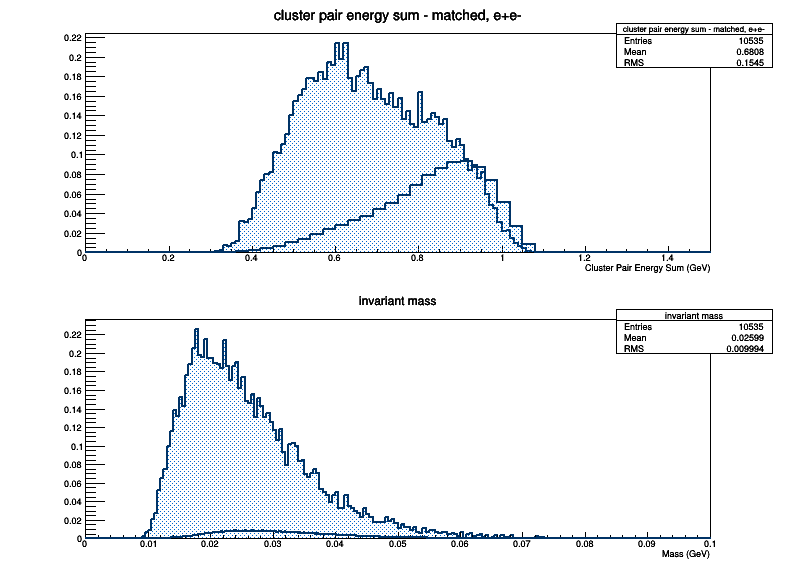

In [4]:
canvas.Clear()
canvas.Divide(1,2)


canvas.cd(1)

histograms = dict()
histograms["bh cluster pair energy sum"] = bh_root_file.Get("cluster pair energy sum - matched, e+e-")
histograms["rad cluster pair energy sum"] = rad_root_file.Get("cluster pair energy sum - matched, e+e-")
histograms["bh invariant mass"] = bh_root_file.Get("invariant mass")
histograms["rad invariant mass"] = rad_root_file.Get("invariant mass")

# Scale the histograms to the cross section
histograms["bh cluster pair energy sum"].Scale(8.28/histograms["bh cluster pair energy sum"].Integral())
histograms["rad cluster pair energy sum"].Scale(1/histograms["rad cluster pair energy sum"].Integral())
histograms["bh invariant mass"].Scale(8.28/histograms["bh invariant mass"].Integral())
histograms["rad invariant mass"].Scale(1/histograms["rad invariant mass"].Integral())

histograms["bh cluster pair energy sum"].Draw()
histograms["rad cluster pair energy sum"].Draw("same")

canvas.cd(2)
histograms["bh invariant mass"].Draw()
histograms["rad invariant mass"].Draw("same")

canvas

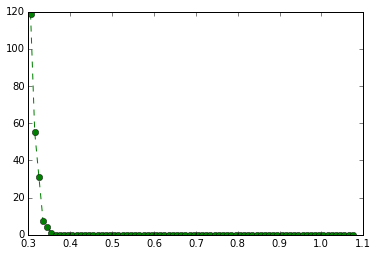

In [15]:
rad_count = []
bh_count = []
cluster_energy_sum_value = []

for bin_number in xrange(1, histograms["bh cluster pair energy sum"].GetXaxis().GetNbins()): 
    bin_center = histograms["bh cluster pair energy sum"].GetXaxis().GetBinCenter(bin_number)
    bin_cont = histograms["bh cluster pair energy sum"].GetBinContent(bin_number)
    
    if bin_cont == 0 : continue
    
    bh_count.append(bin_cont)
    cluster_energy_sum_value.append(bin_center)
    #print "Energy: " + str(bin_center) + " BH count: " + str(bin_cont)
    
    bin_center = histograms["rad cluster pair energy sum"].GetXaxis().GetBinCenter(bin_number)
    bin_cont = histograms["rad cluster pair energy sum"].GetBinContent(bin_number)
    rad_count.append(bin_cont)
    #print "Energy: " + str(bin_center) + " Rad count: " + str(bin_cont)
    
rad_to_bh = []
for index in xrange(0, len(bh_count)) :
    if bh_count[index] == 0 : continue
    
    rad_to_bh.append(rad_count[index]/bh_count[index])

plt.plot(cluster_energy_sum_value, rad_to_bh, 'g--o')